<a href="https://colab.research.google.com/github/vamsikandula03/pytorch-learning/blob/main/Linear_regression%20build%20layer%20by%20layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#pip install d2l


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 83.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.2
    Uninstalling pyparsing-3.1.2:
      Successfully uninstalled pyparsing-3.1.2
  Attempting uninstall: 

In [1]:
import random
import torch
from d2l import torch as d2l

we genarate a synthetic data and give true weight and bias as a input to generate a normally distributed data

Here X is the data features and Y is given as
Y= wX+b+noise so we use matrixmultiply and add bias and a normal distribution to get the labels or regression values of Y according to our dataset

In [2]:
def synthetic_data(w,b,datasetlength):
  X=torch.normal(0,1,(datasetlength,len(w)))
  y=torch.matmul(X,w)+b
  y+=torch.normal(0,0.01,y.shape)
  return X,y.reshape((-1,1))



In [3]:
true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)

In [4]:
labels[:5]


tensor([[ 7.6423],
        [ 3.9325],
        [ 1.5264],
        [-1.4842],
        [ 4.3073]])

In [5]:
features[:5]

tensor([[-0.3879, -1.2398],
        [ 2.0070,  1.2636],
        [-0.7853,  0.3217],
        [-0.5998,  1.3184],
        [ 1.4851,  0.8379]])

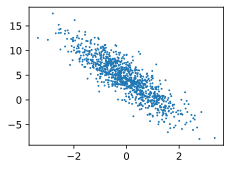

In [6]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1);

training a model is making multiple passes
over dataset and grabbing a minibatch dataset and updating model weights .

So we define a function data_iter to do that process

In [11]:
def data_iter(batch_size,features,labels):
  num=len(features)
  indeces=list(range(num))
  random.shuffle(indeces)
  for i in range(0,num,batch_size):
    batch_indices=torch.tensor(indeces[i:min(i+batch_size,num)])
    yield features[batch_indices],labels[batch_indices]


In [13]:
batch_size=10
for X,y in data_iter(batch_size,features,labels):
  print(X,"\n",y)
  break

tensor([[-1.1379, -0.9934],
        [ 0.6645, -0.1653],
        [ 0.1229,  0.3399],
        [ 0.8633, -0.8824],
        [ 0.3161,  0.5365],
        [-1.0828,  1.1063],
        [-0.1460, -0.8589],
        [-1.8921,  1.4340],
        [ 1.2144, -0.3402],
        [ 1.5730, -0.9801]]) 
 tensor([[ 5.2980],
        [ 6.1080],
        [ 3.2899],
        [ 8.9336],
        [ 3.0019],
        [-1.7414],
        [ 6.8269],
        [-4.4501],
        [ 7.7853],
        [10.6695]])


intializing model parameters


In [15]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

defining model


In [16]:
def lin_reg(X,w,b):
  return torch.matmul(X,w)+b

In [17]:
def squared_loss(y_hat,y):
  return (y_hat-y.reshape(y_hat.shape))**2 /2

In [20]:
def sgd(params,lr,batch_size):
  with torch.no_grad():
    for param in params:
     param-=lr*param.grad/batch_size
     param.grad.zero_()

In [22]:
lr=0.03
epochs=3
net=lin_reg
loss=squared_loss

In [27]:
for epoch in range(epochs):
  for X,y in data_iter(batch_size,features,labels):
    l=loss(net(X,w,b),y)
    l.sum().backward()
    sgd([w,b],lr,batch_size)
  with torch.no_grad():
    trainl=loss(net(features,w,b),labels)
    print("epoch :"+str(epoch)+"  loss :"+str(float(trainl.mean())))

epoch :0  loss :4.911653377348557e-05
epoch :1  loss :4.9082918849308044e-05
epoch :2  loss :4.921499566989951e-05


In [28]:
true_w

tensor([ 2.0000, -3.4000])

In [29]:
w.reshape(true_w.shape)

tensor([ 2.0005, -3.4004], grad_fn=<ViewBackward0>)

In [30]:
true_b

4.2

In [31]:
b

tensor([4.2006], requires_grad=True)